# Notes on Weight Initialization of Neural Networks
***

In [27]:
import itertools
import numpy as np
import torch
import torch.nn as nn
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_digits

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("retina")
mpl.rcParams["text.usetex"] = True
mpl.rcParams["font.family"] = "serif"

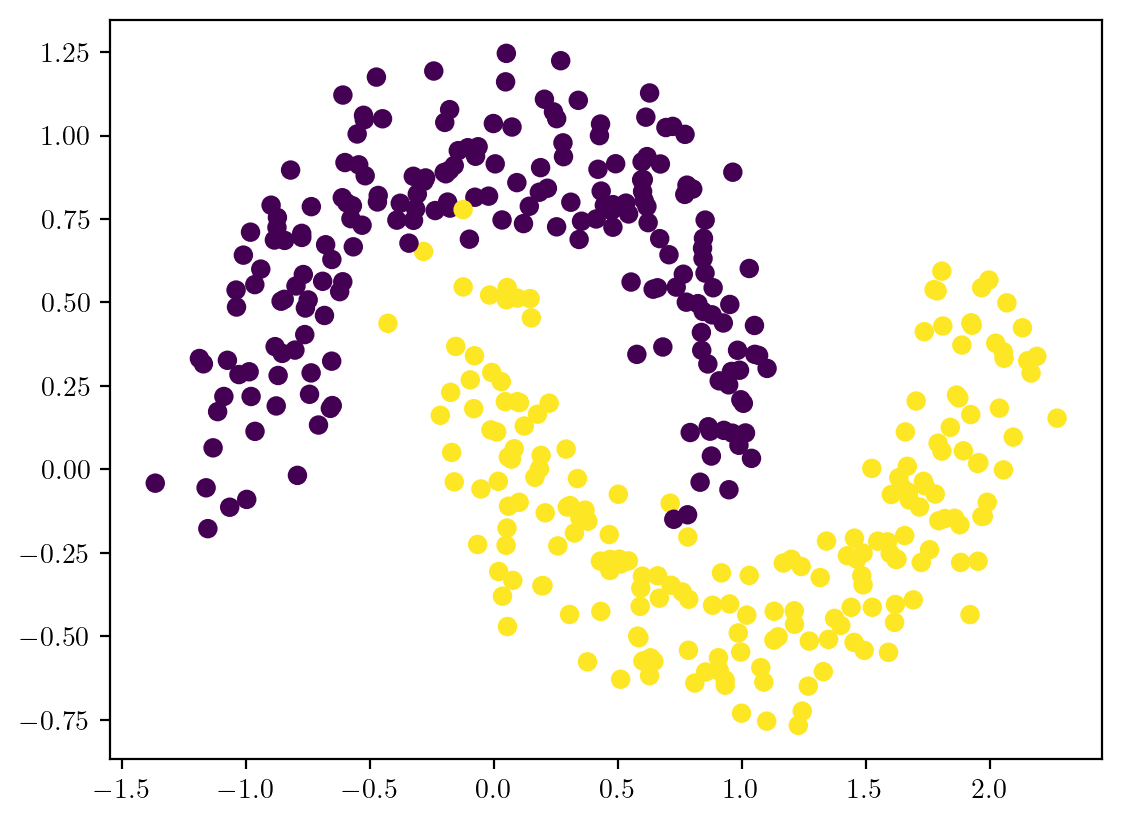

In [9]:
X, y = make_moons(n_samples=400, noise=0.15, random_state=10)
plt.scatter(X[:, 0], X[:, 1], c=y)
None

Load MNIST dataset

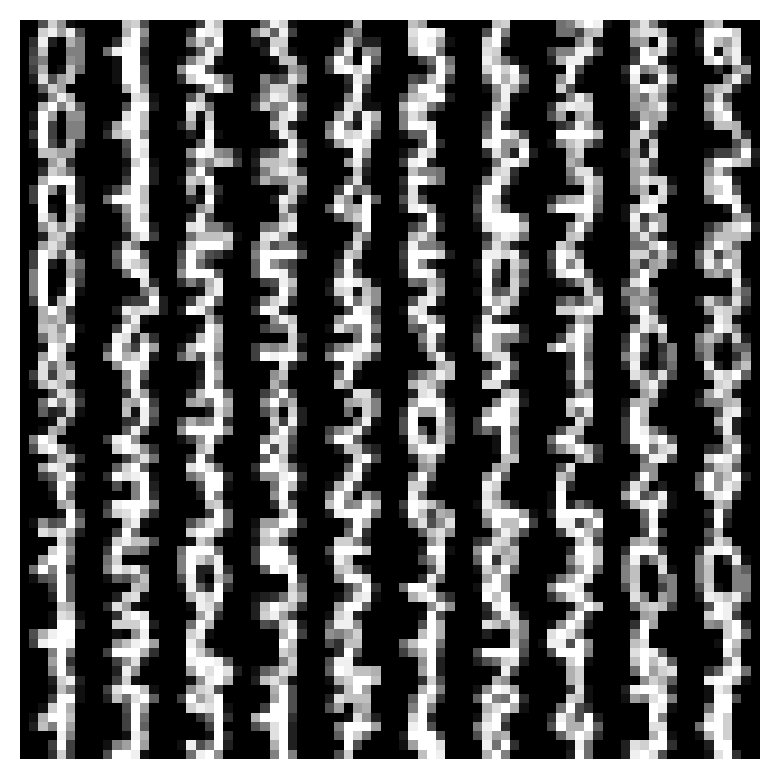

In [26]:
X, y = load_digits(return_X_y=True)
X_img = X[:100].reshape(10, 10, 8, 8)
plt.imshow(np.transpose(X_img, (0,2,1,3)).reshape(80,80), cmap="gray")
plt.gca().set_axis_off()

Create a Fully-Connected Neural network

In [29]:
class MLP(nn.Module):

    def __init__(self, input_size, hidden_units, output_size, initialization="zero"):
        l = [input_size] + list(hidden_units) + [output_size]
        weights = []
        biases  = []
        for _in, _out in itertools.pairwise(l):
            if initialization == "zero":
                W = torch.zeros(_in, _out, dtype=torch.float32, requires_grad=True)
            elif initialization == "uniform":
                W = torch.rand(_in, _out, dtype=torch.float32, requires_grad=True)
            elif initialization == "xavier":
                W = torch.rand(_in, _out, dtype=torch.float32, requires_grad=True)
                W = W / _in
            elif initialization == "normal":
                W = torch.randn(_in, _out, dtype=torch.float32, requires_grad=True)
            weights.append(W)
            b = torch.zeros(_out, dtype=torch.float32, requires_grad=True)
            biases.append(b)

        self.weights = nn.ModuleList(weights)
        self.biases = nn.ModuleList(biases)

    def forward(self, x):
        for W, b in zip(self.weights, self.biases):
            x = x @ W + b
        return x
